<a href="https://colab.research.google.com/github/nivetha010622/phase-3/blob/main/PROJECT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# For analysis and cleaning
import pandas as pd
import numpy as np
# for visaluatztion
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Load data
df = pd.read_csv("/content/sentiment_analysis.py.csv")

In [ ]:
df=pd.read_csv('/content/sentiment_analysis.py.csv')
df.head()

,Unnamed: 0.1,Unnamed: 0,Text,Sentiment,Timestamp,User,Platform,Hashtags,Retweets,Likes,Country,Year,Month,Day,Hour
0,0,0,Enjoying a beautiful day at the park! ...,Positive,15-01-2023 12:30,User123,Twitter,#Nature #Park,15,30,USA,2023,1,15,12
1,1,1,Traffic was terrible this morning. ...,Negative,15-01-2023 08:45,CommuterX,Twitter,#Traffic #Morning,5,10,Canada,2023,1,15,8
2,2,2,Just finished an amazing workout! 💪 ...,Positive,15-01-2023 15:45,FitnessFan,Instagram,#Fitness #Workout,20,40,USA,2023,1,15,15
3,3,3,Excited about the upcoming weekend getaway! ...,Positive,15-01-2023 18:20,AdventureX,Facebook,#Travel #Adventure,8,15,UK,2023,1,15,18
4,4,4,Trying out a new recipe for dinner tonight. ...,Neutral,15-01-2023 19:55,ChefCook,Instagram,#Cooking #Food,12,25,Australia,2023,1,15,19


In [ ]:
df.shape

(732, 15)

In [ ]:
df.drop(columns='Unnamed: 0.1',inplace = True)

In [ ]:
# Rename column Unnamed: 0 to id
df.rename(columns={'Unnamed: 0':'Id'},inplace=True)

In [ ]:
df.isnull().sum()

,0
Id,0
Text,0
Sentiment,0
Timestamp,0
User,0
Platform,0
Hashtags,0
Retweets,0
Likes,0
Country,0


In [ ]:
df.dtypes

,0
Id,int64
Text,object
Sentiment,object
Timestamp,object
User,object
Platform,object
Hashtags,object
Retweets,int64
Likes,int64
Country,object


In [ ]:
df['Timestamp'] = pd.to_datetime(df['Timestamp'])
df['Day'] = df['Timestamp'].dt.day
df['Month'] = df['Timestamp'].dt.month
df['Year'] = df['Timestamp'].dt.year

<ipython-input-15-7fafb549d773>:1: UserWarning: Parsing dates in %d-%m-%Y %H:%M format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df['Timestamp'] = pd.to_datetime(df['Timestamp'])


In [ ]:
df['Text']= df['Text'].str.strip()
df['Sentiment']= df['Sentiment'].str.strip()
df['User']= df['User'].str.strip()
df['Platform']= df['Platform'].str.strip()
df['Hashtags']= df['Hashtags'].str.strip()
df['Country']= df['Country'].str.strip()

In [ ]:
df.head(1)

,Id,Text,Sentiment,Timestamp,User,Platform,Hashtags,Retweets,Likes,Country,Year,Month,Day,Hour
0,0,Enjoying a beautiful day at the park!,Positive,2023-01-15 12:30:00,User123,Twitter,#Nature #Park,15,30,USA,2023,1,15,12


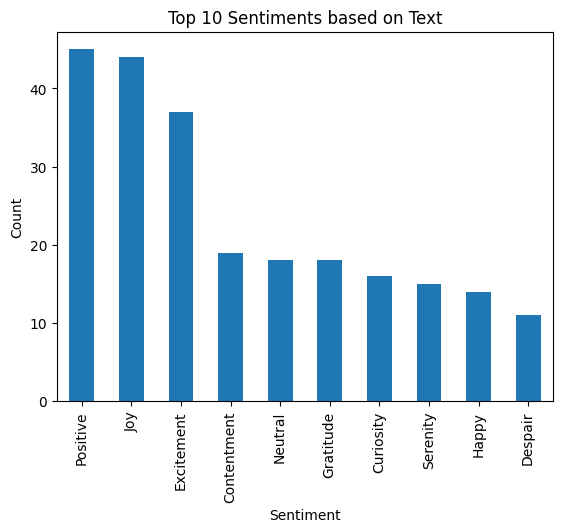

In [ ]:
df['Sentiment'].value_counts().nlargest(10).plot(kind='bar')
plt.title('Top 10 Sentiments based on Text')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()

In [ ]:
df['Platform'].value_counts()

,count
Platform,
Instagram,258
Twitter,243
Facebook,231


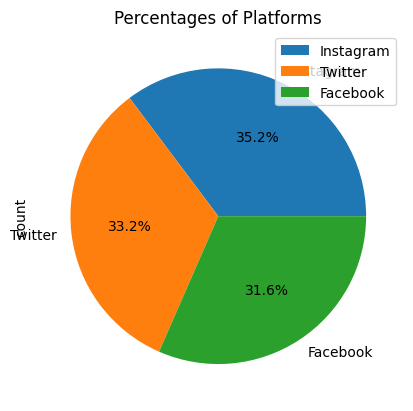

In [ ]:
df['Platform'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title('Percentages of Platforms')
plt.legend()
plt.show()

In [ ]:
# Descrip data nurimucal
df.describe()

,Id,Timestamp,Retweets,Likes,Year,Month,Day,Hour
count,732.000000,732,732.000000,732.000000,732.000000,732.000000,732.000000,732.000000
mean,369.740437,2020-12-08 21:37:38.196721408,21.508197,42.901639,2020.471311,6.122951,15.497268,15.521858
min,0.000000,2010-05-15 15:30:00,5.000000,10.000000,2010.000000,1.000000,1.000000,0.000000
25%,185.750000,2019-03-08 17:27:30,17.750000,34.750000,2019.000000,3.000000,9.000000,13.000000
50%,370.500000,2021-09-20 14:30:00,22.000000,43.000000,2021.000000,6.000000,15.000000,16.000000
75%,553.250000,2023-02-26 11:48:45,25.000000,50.000000,2023.000000,9.000000,22.000000,19.000000
max,736.000000,2023-10-22 20:45:00,40.000000,80.000000,2023.000000,12.000000,31.000000,23.000000
std,212.428936,NaN,7.061286,14.089848,2.802285,3.411763,8.474553,4.113414


In [ ]:
numerical_columns = df[['Day', 'Month', 'Year', 'Likes', 'Retweets']]

for col in numerical_columns.columns:
    print(f"Minimum {col}: {df[col].min()} | Maximum {col}: {df[col].max()}")

Minimum Day: 1 | Maximum Day: 31
Minimum Month: 1 | Maximum Month: 12
Minimum Year: 2010 | Maximum Year: 2023
Minimum Likes: 10 | Maximum Likes: 80
Minimum Retweets: 5 | Maximum Retweets: 40


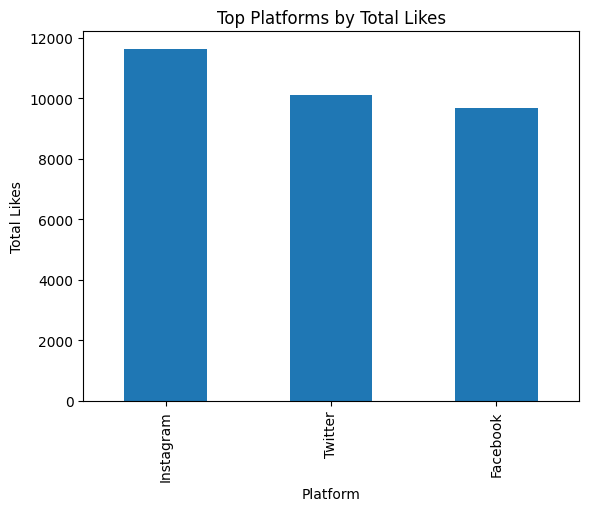

In [ ]:
top_likes_platform = df.groupby('Platform')['Likes'].sum().nlargest(10)
top_likes_platform.plot(kind='bar')
plt.title('Top Platforms by Total Likes')
plt.xlabel('Platform')
plt.ylabel('Total Likes')
plt.show()

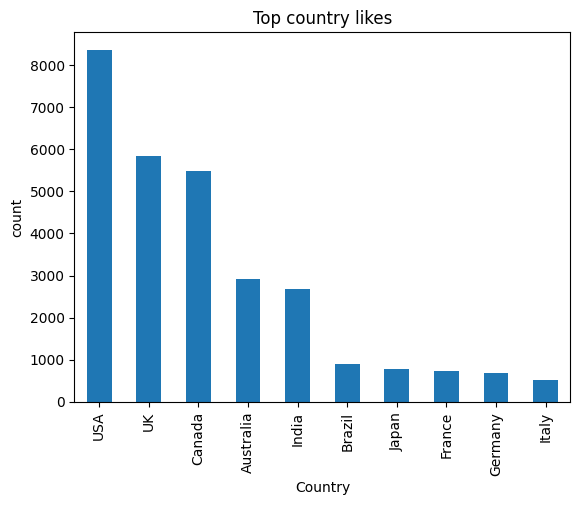

In [ ]:
top_country_likes=df.groupby('Country')['Likes'].sum().nlargest(10)
top_country_likes.plot(kind='bar')
plt.title('Top country likes')
plt.xlabel('Country')
plt.ylabel('count')
plt.show()

In [ ]:
Facebook=df[df['Platform']=='Facebook']
Twitter=df[df['Platform']=='Twitter']
Instagram=df[df['Platform']=='Instagram']

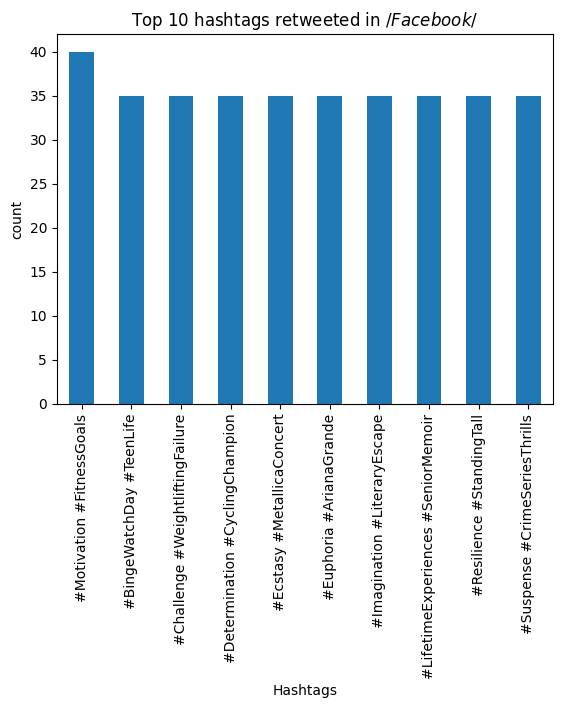

In [ ]:
H_R_f=Facebook.groupby('Hashtags')['Retweets'].max().nlargest(10).sort_values(ascending=False)
H_R_f.plot(kind='bar')
plt.title('Top 10 hashtags retweeted in $/ Facebook $/')
plt.xlabel('Hashtags')
plt.ylabel('count')
plt.show()

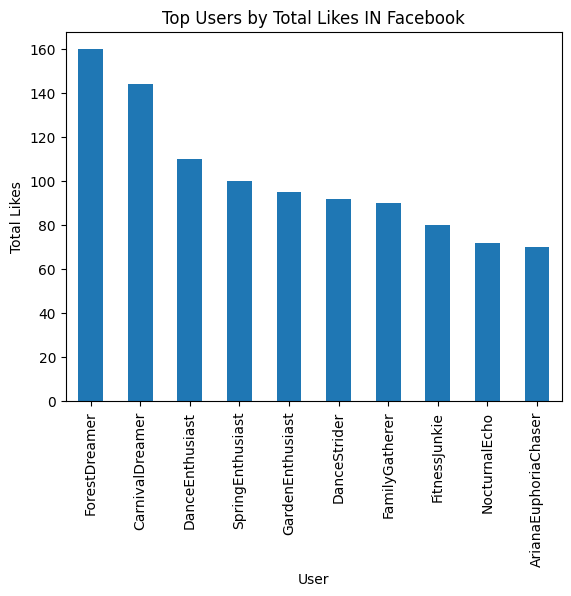

In [ ]:
top_likes_platform_F = Facebook.groupby('User')['Likes'].sum().nlargest(10)
top_likes_platform_F.plot(kind='bar')
plt.title('Top Users by Total Likes IN Facebook')
plt.xlabel('User')
plt.ylabel('Total Likes')
plt.show()

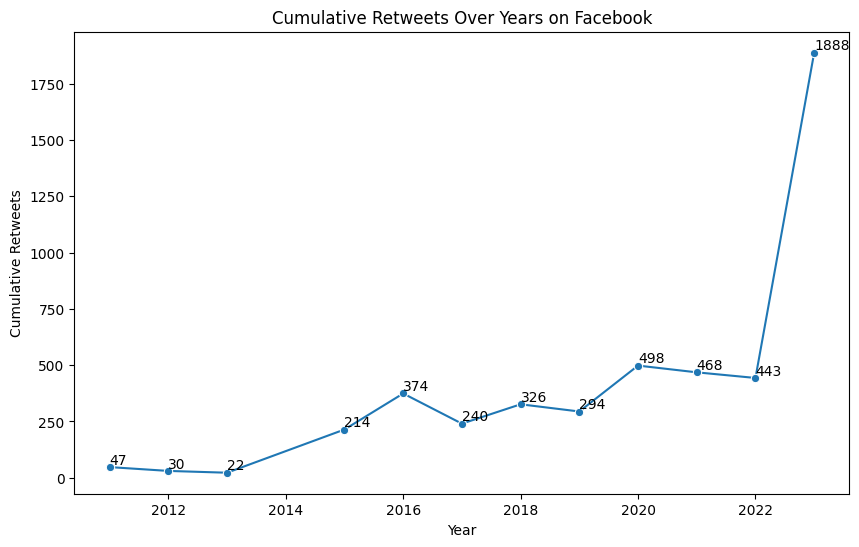

In [ ]:
f = Facebook.groupby('Year')['Retweets'].sum().reset_index()
plt.figure(figsize=(10, 6))
sns.lineplot(data=f, x='Year', y='Retweets', marker='o')
for index, value in f.iterrows():
    plt.text(value['Year'], value['Retweets'], str(value['Retweets']), ha='left', va='bottom')

plt.title('Cumulative Retweets Over Years on Facebook')
plt.xlabel('Year')
plt.ylabel('Cumulative Retweets')

plt.show()

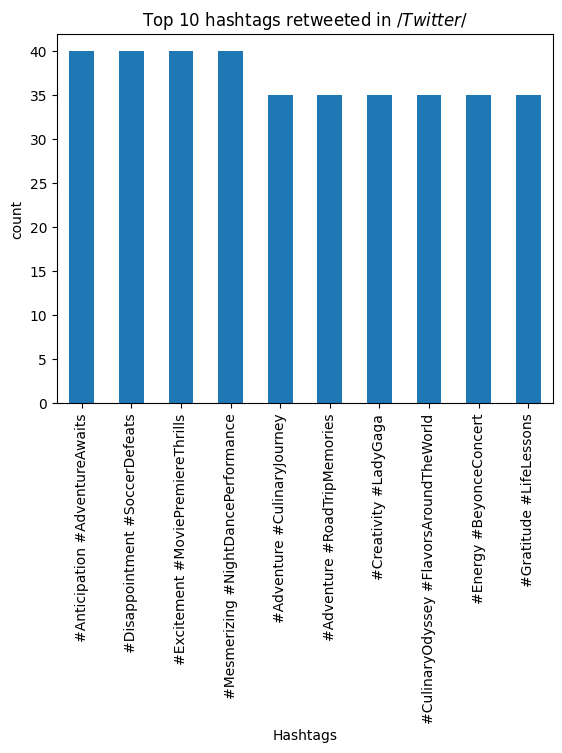

In [ ]:
H_R_t=Twitter.groupby('Hashtags')['Retweets'].max().nlargest(10).sort_values(ascending=False)
H_R_t.plot(kind='bar')
plt.title('Top 10 hashtags retweeted in $/ Twitter $/')
plt.xlabel('Hashtags')
plt.ylabel('count')
plt.show()

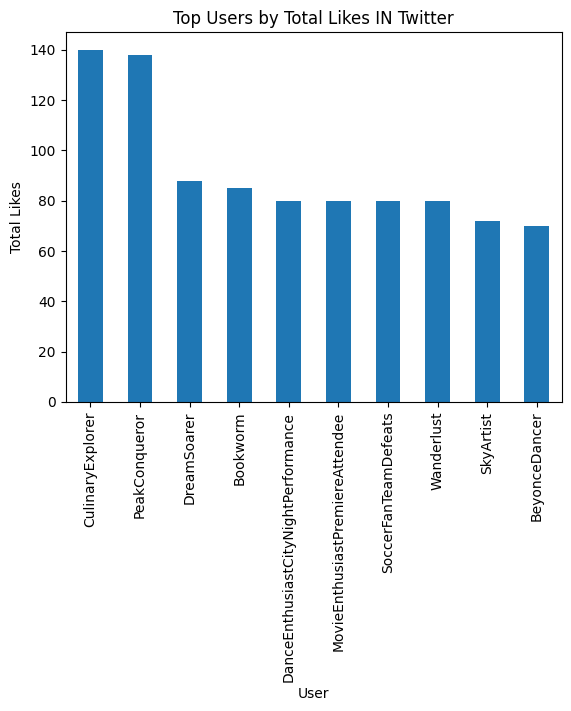

In [ ]:
top_likes_platform_t = Twitter.groupby('User')['Likes'].sum().nlargest(10)
top_likes_platform_t.plot(kind='bar')
plt.title('Top Users by Total Likes IN Twitter')
plt.xlabel('User')
plt.ylabel('Total Likes')
plt.show()

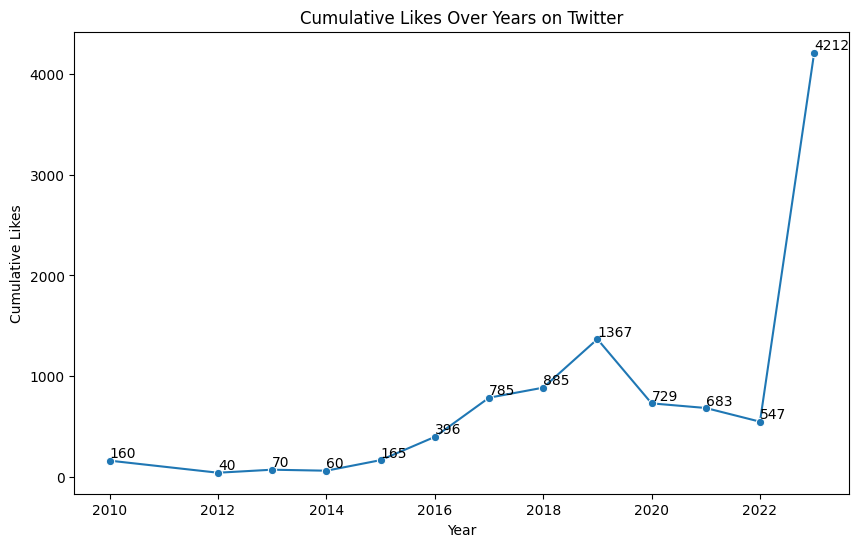

In [ ]:
f = Twitter.groupby('Year')['Likes'].sum().reset_index()
plt.figure(figsize=(10, 6))
sns.lineplot(data=f, x='Year', y='Likes', marker='o')
for index, value in f.iterrows():
    plt.text(value['Year'], value['Likes'], str(value['Likes']), ha='left', va='bottom')

plt.title('Cumulative Likes Over Years on Twitter')
plt.xlabel('Year')
plt.ylabel('Cumulative Likes')

plt.show()

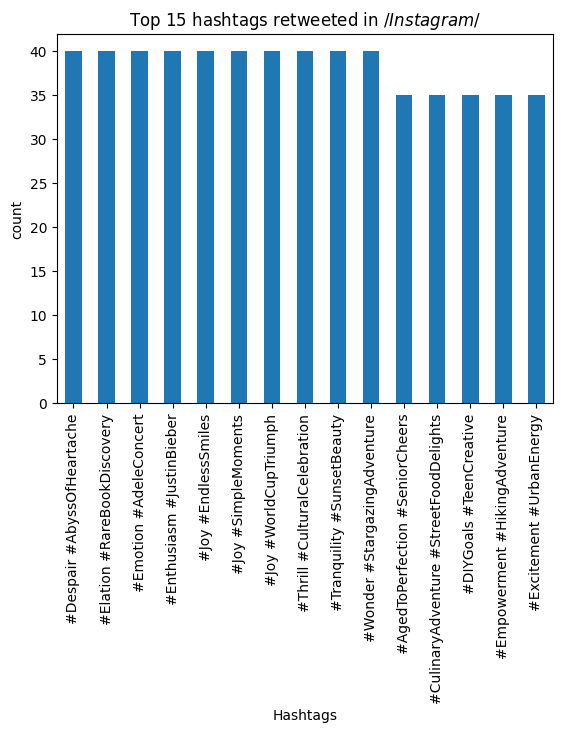

In [ ]:
H_R_i=Instagram.groupby('Hashtags')['Retweets'].max().nlargest(15).sort_values(ascending=False)
H_R_i.plot(kind='bar')
plt.title('Top 15 hashtags retweeted in $/ Instagram $/')
plt.xlabel('Hashtags')
plt.ylabel('count')
plt.show()

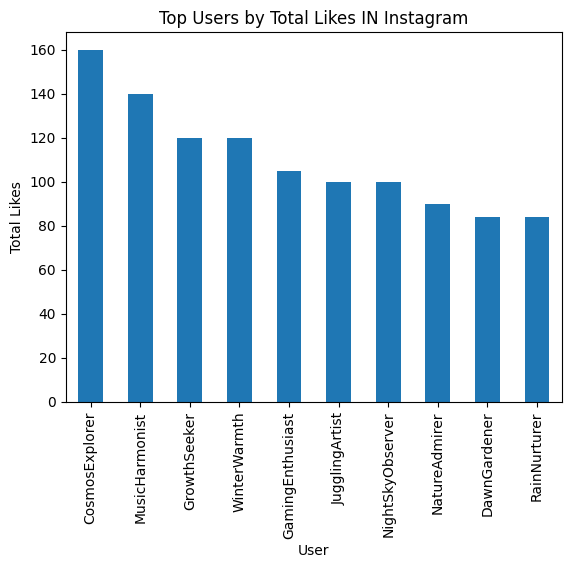

In [ ]:
top_likes_platform_i = Instagram.groupby('User')['Likes'].sum().nlargest(10)
top_likes_platform_i.plot(kind='bar')
plt.title('Top Users by Total Likes IN Instagram')
plt.xlabel('User')
plt.ylabel('Total Likes')
plt.show()

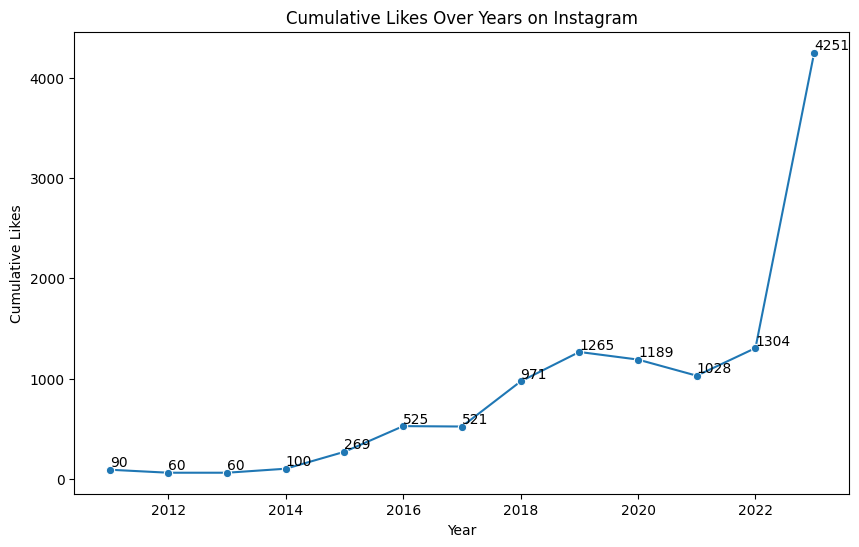

In [ ]:
f = Instagram.groupby('Year')['Likes'].sum().reset_index()
plt.figure(figsize=(10, 6))
sns.lineplot(data=f, x='Year', y='Likes', marker='o')
for index, value in f.iterrows():
    plt.text(value['Year'], value['Likes'], str(value['Likes']), ha='left', va='bottom')

plt.title('Cumulative Likes Over Years on Instagram')
plt.xlabel('Year')
plt.ylabel('Cumulative Likes')

plt.show()

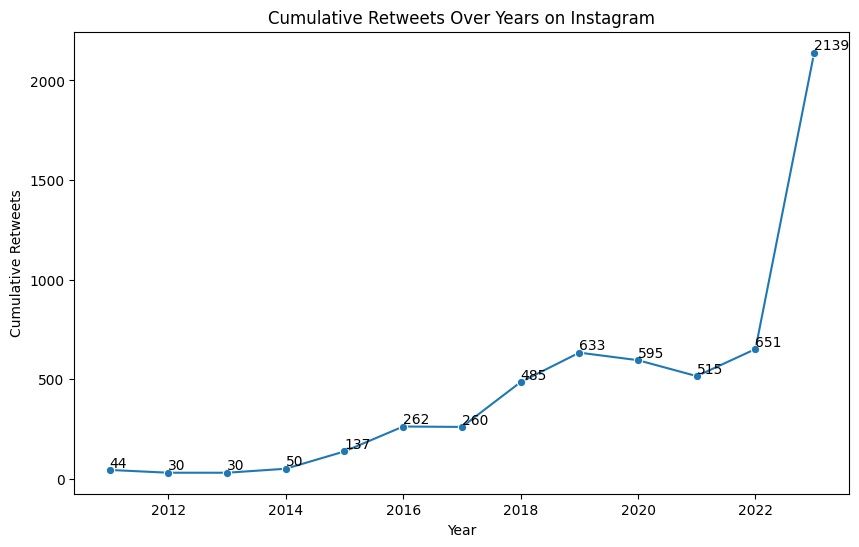

In [ ]:
f = Instagram.groupby('Year')['Retweets'].sum().reset_index()
plt.figure(figsize=(10, 6))
sns.lineplot(data=f, x='Year', y='Retweets', marker='o')
for index, value in f.iterrows():
    plt.text(value['Year'], value['Retweets'], str(value['Retweets']), ha='left', va='bottom')

plt.title('Cumulative Retweets Over Years on Instagram')
plt.xlabel('Year')
plt.ylabel('Cumulative Retweets')

plt.show()

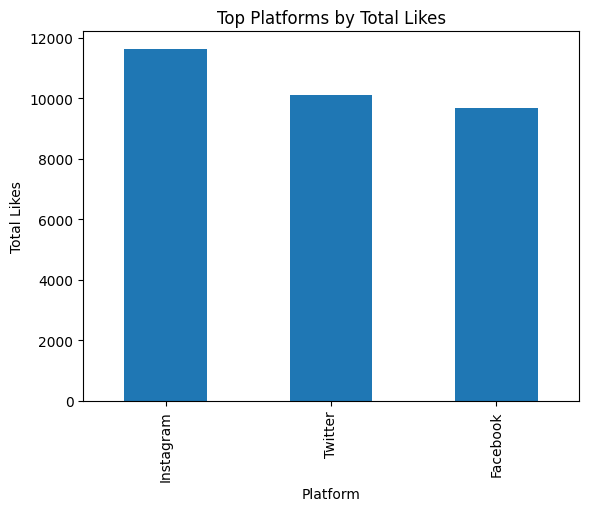

In [ ]:
top_likes_platform = df.groupby('Platform')['Likes'].sum().nlargest(10)
top_likes_platform.plot(kind='bar')
plt.title('Top Platforms by Total Likes')
plt.xlabel('Platform')
plt.ylabel('Total Likes')
plt.show()

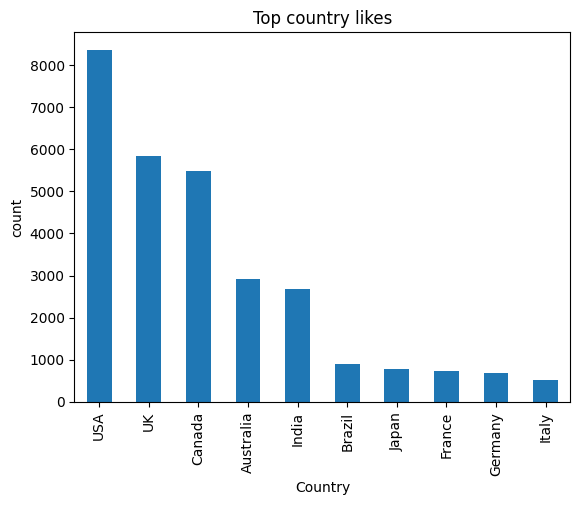

In [ ]:
top_country_likes=df.groupby('Country')['Likes'].sum().nlargest(10)
top_country_likes.plot(kind='bar')
plt.title('Top country likes')
plt.xlabel('Country')
plt.ylabel('count')
plt.show()


In [ ]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# Sample data for social media posts
data = {
    'text': [
        "I am so happy with my life today!",
        "Feeling very sad and down.",
        "This is the best day ever!",
        "I'm so angry at everything right now.",
        "Totally surprised by the results!"
    ],
    'platform': ['Twitter', 'Facebook', 'Twitter', 'Facebook', 'Twitter'],
    'likes': [120, 45, 210, 5, 130],
    'country': ['USA', 'India', 'UK', 'Canada', 'USA'],
    'hour': [14, 9, 18, 22, 7],
    'emotion': ['joy', 'sadness', 'joy', 'anger', 'surprise']  # Target column
}

# Create DataFrame
df = pd.DataFrame(data)

# 1. One-Hot Encoding for 'platform' and 'country'
df_encoded = pd.get_dummies(df, columns=['platform', 'country'])

# 2. Label Encoding for 'emotion'
label_encoder = LabelEncoder()
df_encoded['emotion'] = label_encoder.fit_transform(df_encoded['emotion'])

# Display the result
print("Transformed DataFrame:")
print(df_encoded)


Transformed DataFrame:
                                    text  likes  hour  emotion  \
0      I am so happy with my life today!    120    14        1   
1             Feeling very sad and down.     45     9        2   
2             This is the best day ever!    210    18        1   
3  I'm so angry at everything right now.      5    22        0   
4      Totally surprised by the results!    130     7        3   

   platform_Facebook  platform_Twitter  country_Canada  country_India  \
0              False              True           False          False   
1               True             False           False           True   
2              False              True           False          False   
3               True             False            True          False   
4              False              True           False          False   

   country_UK  country_USA  
0       False         True  
1       False        False  
2        True        False  
3       False        Fals

In [ ]:
import pandas as pd

# Sample data
data = {
    'text': [
        "Great service and very satisfied.",
        "Totally disappointed with the product.",
        "Amazing experience!",
        "Not happy with the support.",
        "Fast delivery, will buy again!"
    ],
    'platform': ['Twitter', 'Facebook', 'Twitter', 'Facebook', 'Twitter'],
    'country': ['USA', 'India', 'UK', 'Canada', 'USA']
}

# Create DataFrame
df = pd.DataFrame(data)

# Display original DataFrame
print("Original DataFrame:\n")
print(df)

# Apply One-Hot Encoding to 'platform' and 'country'
df_encoded = pd.get_dummies(df, columns=['platform', 'country'])

# Display encoded DataFrame
print("\nOne-Hot Encoded DataFrame:\n")
print(df_encoded)


Original DataFrame:

                                     text  platform country
0       Great service and very satisfied.   Twitter     USA
1  Totally disappointed with the product.  Facebook   India
2                     Amazing experience!   Twitter      UK
3             Not happy with the support.  Facebook  Canada
4          Fast delivery, will buy again!   Twitter     USA

One-Hot Encoded DataFrame:

                                     text  platform_Facebook  \
0       Great service and very satisfied.              False   
1  Totally disappointed with the product.               True   
2                     Amazing experience!              False   
3             Not happy with the support.               True   
4          Fast delivery, will buy again!              False   

   platform_Twitter  country_Canada  country_India  country_UK  country_USA  
0              True           False          False       False         True  
1             False           False           Tru

In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

# Sample Data
data = {
    'likes': [120, 45, 210, 5, 130],
    'hour': [14, 9, 18, 22, 7]
}

# Create DataFrame
df = pd.DataFrame(data)
print("Original Data:\n")
print(df)

# Initialize StandardScaler
scaler = StandardScaler()

# Fit and transform the data
scaled_data = scaler.fit_transform(df)

# Create a DataFrame with scaled values
df_scaled = pd.DataFrame(scaled_data, columns=['likes_scaled', 'hour_scaled'])

# Display Scaled Data
print("\nScaled Data (StandardScaler):\n")
print(df_scaled)


Original Data:

   likes  hour
0    120    14
1     45     9
2    210    18
3      5    22
4    130     7

Scaled Data (StandardScaler):

   likes_scaled  hour_scaled
0      0.252397     0.000000
1     -0.799257    -0.900937
2      1.514382     0.720750
3     -1.360140     1.441500
4      0.392618    -1.261312


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Sample data
data = {
    'likes': [120, 45, 210, 5, 130],
    'hour': [14, 9, 18, 22, 7],
    'emotion': ['joy', 'sadness', 'joy', 'anger', 'surprise']  # target
}

# Create DataFrame
df = pd.DataFrame(data)

# Define features (X) and target (y)
X = df[['likes', 'hour']]
y = df['emotion']

# Split the data (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Show results
print("Training Features:\n", X_train)
print("\nTraining Labels:\n", y_train)
print("\nTesting Features:\n", X_test)
print("\nTesting Labels:\n", y_test)


Training Features:
    likes  hour
4    130     7
2    210    18
0    120    14
3      5    22

Training Labels:
 4    surprise
2         joy
0         joy
3       anger
Name: emotion, dtype: object

Testing Features:
    likes  hour
1     45     9

Testing Labels:
 1    sadness
Name: emotion, dtype: object


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

# 1. Sample data
data = {
    "comment": [
        "I love this!",
        "This is horrible",
        "Not sure how I feel",
        "Absolutely amazing experience",
        "Worst service ever",
        "It was okay, not great",
        "I hate it",
        "I like the new design",
        "Terrible product",
        "Pretty decent"
    ],
    "sentiment": [
        "Positive",
        "Negative",
        "Neutral",
        "Positive",
        "Negative",
        "Neutral",
        "Negative",
        "Positive",
        "Negative",
        "Neutral"
    ]
}

df = pd.DataFrame(data)

# 2. Preprocessing (basic)
stop_words = set(stopwords.words('english'))

def preprocess(text):
    return ' '.join([word.lower() for word in text.split() if word.lower() not in stop_words])

df['clean'] = df['comment'].apply(preprocess)

# 3. Vectorization
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(df['clean'])
y = df['sentiment']

# 4. Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# 5. Model
model = LogisticRegression()
model.fit(X_train, y_train)

# 6. Prediction & Output
y_pred = model.predict(X_test)

print("=== Classification Report ===")
print(classification_report(y_test, y_pred))

# 7. Try on new comments
test_comments = ["I love it", "What a waste of time", "It's just fine"]
test_clean = [preprocess(text) for text in test_comments]
test_vect = vectorizer.transform(test_clean)
preds = model.predict(test_vect)

print("\n=== Sample Predictions ===")
for comment, pred in zip(test_comments, preds):
    print(f"'{comment}' → {pred}")


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf

=== Classification Report ===
              precision    recall  f1-score   support

    Negative       0.50      1.00      0.67         1
     Neutral       0.00      0.00      0.00         1

    accuracy                           0.50         2
   macro avg       0.25      0.50      0.33         2
weighted avg       0.25      0.50      0.33         2


=== Sample Predictions ===
'I love it' → Positive
'What a waste of time' → Negative
'It's just fine' → Negative


Accuracy: 0.0 %

Classification Report:

              precision    recall  f1-score   support

    Negative       0.00      0.00      0.00       2.0
     Neutral       0.00      0.00      0.00       1.0
    Positive       0.00      0.00      0.00       0.0

    accuracy                           0.00       3.0
   macro avg       0.00      0.00      0.00       3.0
weighted avg       0.00      0.00      0.00       3.0



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_

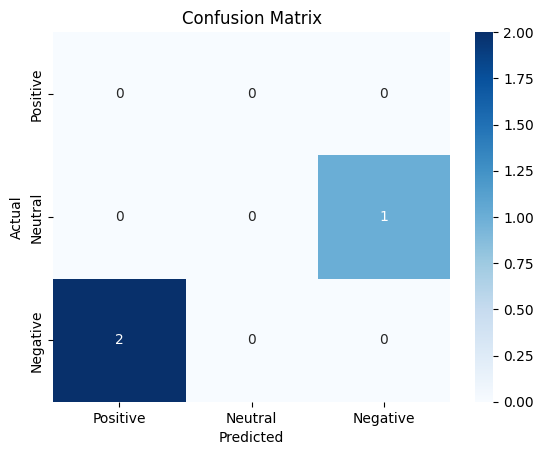

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# 1. Sample Dataset
data = {
    "comment": [
        "I love this!",
        "This is horrible",
        "Not sure how I feel",
        "Absolutely amazing experience",
        "Worst service ever",
        "It was okay, not great",
        "I hate it",
        "I like the new design",
        "Terrible product",
        "Pretty decent"
    ],
    "sentiment": [
        "Positive",
        "Negative",
        "Neutral",
        "Positive",
        "Negative",
        "Neutral",
        "Negative",
        "Positive",
        "Negative",
        "Neutral"
    ]
}
df = pd.DataFrame(data)

# 2. Vectorize text
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(df['comment'])
y = df['sentiment']

# 3. Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 4. Model training
model = LogisticRegression()
model.fit(X_train, y_train)

# 5. Predictions
y_pred = model.predict(X_test)

# 6. Evaluation
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", round(accuracy * 100, 2), "%\n")

print("Classification Report:\n")
print(classification_report(y_test, y_pred))

# 7. Confusion Matrix
cm = confusion_matrix(y_test, y_pred, labels=["Positive", "Neutral", "Negative"])
sns.heatmap(cm, annot=True, fmt='d', xticklabels=["Positive", "Neutral", "Negative"],
            yticklabels=["Positive", "Neutral", "Negative"], cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder

# Sample data
data = {
    'likes': [120, 45, 210, 5, 130],
    'hour': [14, 9, 18, 22, 7],
    'emotion': ['joy', 'sadness', 'joy', 'anger', 'surprise']  # target
}

# Create DataFrame
df = pd.DataFrame(data)

# Encode the target labels
label_encoder = LabelEncoder()
df['emotion_encoded'] = label_encoder.fit_transform(df['emotion'])

# Define features and target
X = df[['likes', 'hour']]
y = df['emotion_encoded']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

# Train the model
model = LogisticRegression()
model.fit(X_train, y_train)

# --- ✅ Make prediction on new input ---
# New input data: likes=100, hour=10
new_input = pd.DataFrame({'likes': [100], 'hour': [10]})

# Predict using the trained model
predicted_class = model.predict(new_input)[0]

# Decode the predicted label back to original emotion
predicted_emotion = label_encoder.inverse_transform([predicted_class])[0]

# Output result
print("New Input:")
print(new_input)
print("\nPredicted Emotion:", predicted_emotion)


New Input:
   likes  hour
0    100    10

Predicted Emotion: joy


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
import pandas as pd

# Example new input from a user (as a dictionary)
new_input = {
    'platform': ['Twitter'],
    'country': ['USA'],
    'likes': [150],
    'hour': [15]
}

# Step 1: Convert dictionary to DataFrame
new_df = pd.DataFrame(new_input)
print("Original New Input DataFrame:\n")
print(new_df)

# Step 2: Assume this is how training data was encoded
# Simulating One-Hot Encoding used during training
expected_columns = ['likes', 'hour',
                    'platform_Facebook', 'platform_Twitter',
                    'country_Canada', 'country_India', 'country_UK', 'country_USA']

# Step 3: Apply one-hot encoding to new input
new_encoded = pd.get_dummies(new_df)

# Step 4: Add any missing columns (set them to 0)
for col in expected_columns:
    if col not in new_encoded.columns:
        new_encoded[col] = 0

# Step 5: Ensure correct column order
new_encoded = new_encoded[expected_columns]

# Step 6: Display the final encoded input
print("\nEncoded New Input (Ready for Prediction):\n")
print(new_encoded)


Original New Input DataFrame:

  platform country  likes  hour
0  Twitter     USA    150    15

Encoded New Input (Ready for Prediction):

   likes  hour  platform_Facebook  platform_Twitter  country_Canada  \
0    150    15                  0              True               0   

   country_India  country_UK  country_USA  
0              0           0         True  


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# Step 1: Sample student performance data
data = {
    'G1': [10, 14, 12, 8, 16],
    'G2': [11, 15, 13, 7, 17],
    'studytime': [2, 3, 2, 1, 4],
    'failures': [0, 0, 1, 2, 0],
    'absences': [4, 2, 10, 12, 1],
    'G3': [11, 15, 13, 6, 18]  # Final grade
}

# Step 2: Convert to DataFrame
df = pd.DataFrame(data)

# Step 3: Define features and target
X = df[['G1', 'G2', 'studytime', 'failures', 'absences']]
y = df['G3']

# Step 4: Train/test split (optional in this small example)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 5: Train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Step 6: New student input for prediction
new_student = pd.DataFrame({
    'G1': [13],
    'G2': [14],
    'studytime': [3],
    'failures': [0],
    'absences': [3]
})

# Step 7: Predict final grade (G3)
predicted_grade = model.predict(new_student)[0]
print("Predicted Final Grade (G3):", round(predicted_grade, 2))


Predicted Final Grade (G3): 14.5


In [ ]:
pip install streamlit


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 2.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.9/9.9 MB 62.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 94.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.1/79.1 kB 6.0 MB/s eta 0:00:00


In [ ]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# Step 1: Sample student performance data (like before)
data = {
    'G1': [10, 14, 12, 8, 16],
    'G2': [11, 15, 13, 7, 17],
    'studytime': [2, 3, 2, 1, 4],
    'failures': [0, 0, 1, 2, 0],
    'absences': [4, 2, 10, 12, 1],
    'G3': [11, 15, 13, 6, 18]  # Final grade
}

# Step 2: Create DataFrame
df = pd.DataFrame(data)

# Step 3: Define features and target
X = df[['G1', 'G2', 'studytime', 'failures', 'absences']]
y = df['G3']

# Step 4: Train the model (Linear Regression)
model = LinearRegression()
model.fit(X, y)

# Step 5: Define the prediction function
def predict_final_grade(G1, G2, studytime, failures, absences):
    # Create a DataFrame for the new student input
    new_student = pd.DataFrame({
        'G1': [G1],
        'G2': [G2],
        'studytime': [studytime],
        'failures': [failures],
        'absences': [absences]
    })

    # Predict the final grade (G3)
    predicted_grade = model.predict(new_student)[0]
    return round(predicted_grade, 2)

# Step 6: Test the prediction function with new input
# Example: Student with G1=13, G2=14, studytime=3, failures=0, absences=2
predicted_grade = predict_final_grade(13, 14, 3, 0, 2)

# Display the predicted final grade
print("Predicted Final Grade (G3):", predicted_grade)

Predicted Final Grade (G3): 14.37


In [ ]:
!pip install gradio --upgrade
import gradio as gr
import pandas as pd
from sklearn.linear_model import LinearRegression



# Step 1: Sample student performance data
data = {
    'G1': [10, 14, 12, 8, 16],
    'G2': [11, 15, 13, 7, 17],
    'studytime': [2, 3, 2, 1, 4],
    'failures': [0, 0, 1, 2, 0],
    'absences': [4, 2, 10, 12, 1],
    'G3': [11, 15, 13, 6, 18]  # Final grade
}

# Step 2: Create DataFrame
df = pd.DataFrame(data)

# Step 3: Define features and target
X = df[['G1', 'G2', 'studytime', 'failures', 'absences']]
y = df['G3']

# Step 4: Train the model (Linear Regression)
model = LinearRegression()
model.fit(X, y)

# Step 5: Define the prediction function
def predict_final_grade(G1, G2, studytime, failures, absences):
    # Create a DataFrame for the new student input
    new_student = pd.DataFrame({
        'G1': [G1],
        'G2': [G2],
        'studytime': [studytime],
        'failures': [failures],
        'absences': [absences]
    })

    # Predict the final grade (G3)
    predicted_grade = model.predict(new_student)[0]
    return round(predicted_grade, 2)

# Step 6: Build the Gradio Interface
iface = gr.Interface(
    fn=predict_final_grade,  # Function that takes inputs and returns the predicted grade
    inputs=[
        gr.Number(label="G1 (1st Period Grade)"),
        gr.Number(label="G2 (2nd Period Grade)"),
        gr.Slider(minimum=1, maximum=4, value=2, label="Study Time (1=Low, 4=High)"), # Changed 'default' to 'value'
        gr.Number(label="Failures (Number of Failures)"),
        gr.Number(label="Absences (Number of Absences)")
    ],
    outputs=gr.Textbox(label="Predicted Final Grade (G3)"),
    live=True  # This will update the prediction as inputs change
)

# Step 7: Launch the Gradio app
iface.launch()

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.1/54.1 MB 8.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 322.9/322.9 kB 19.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 95.2/95.2 kB 7.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.5/11.5 MB 90.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.0/72.0 kB 5.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.5/62.5 kB 5.6 MB/s eta 0:00:00
It looks like you are running Gradio on a hosted a Jupyter notebook. For the Gradio app to work, sharing must be enabled. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://299835b5561d11c491.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory t